Stochastic Process
tip: typo in book:
P206

In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
seed = 666

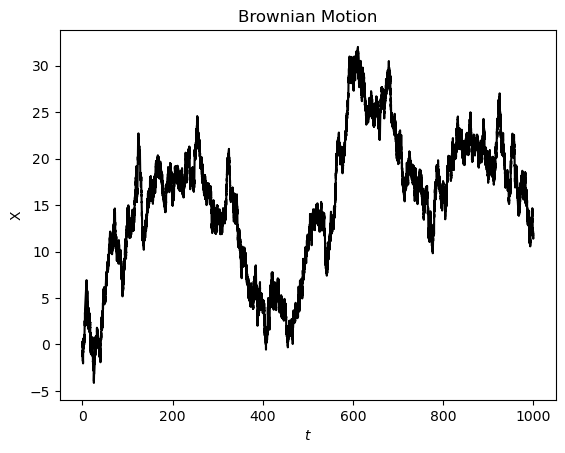

In [7]:
def BrownianMotion(t):
    X = np.zeros(N + 1)
    X[0] = np.array(0)
    for i in range(1, N+1):
        dt = t[i] - t[i-1]
        X[i] = X[i-1] + sqrt(dt)*np.random.randn()
    return X

T = 1000; N = 100000
t = np.linspace(0, T, N+1)
X=BrownianMotion(t)
plt.plot(t,X,'k-')
s=plt.xlabel(r'$t$')
s=plt.ylabel(r'X')
s=plt.title(r'Brownian Motion')

Brownian bridge

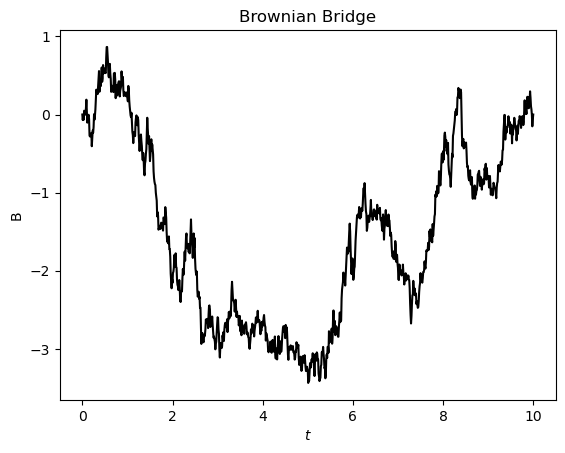

In [33]:
def BrownianBridge(t):
    """
    A5.2 Page 195
    """
    W = BrownianMotion(t)
    X = W - W[-1] * (t - t[0]) / (t[-1] - t[0])
    return X

X = BrownianBridge(t)
plt.plot(t,X,'k-')
s=plt.xlabel(r'$t$')
s=plt.ylabel(r'B')
s=plt.title(r'Brownian Bridge')

Fractional Brownian Motion
Use discrete KL expansion to build... Since the increment is correlated.

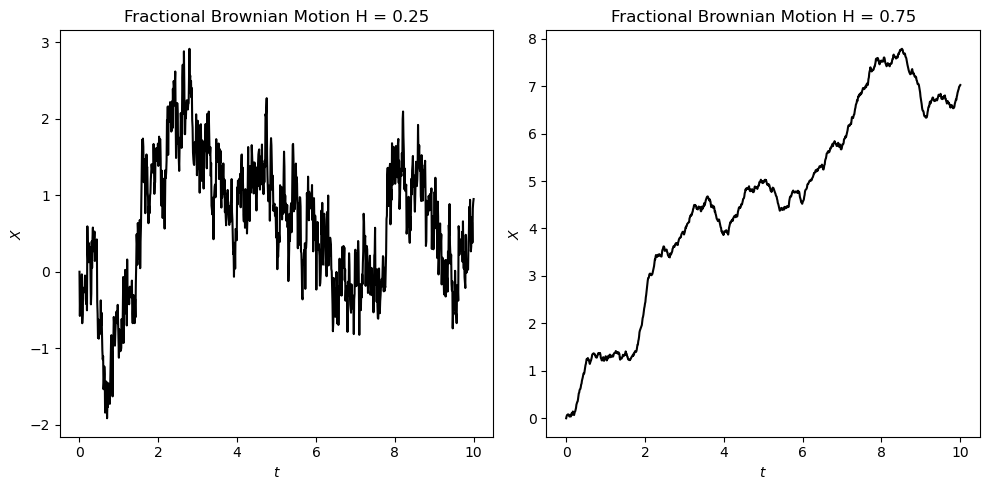

In [41]:
def Fractional_BM(t, H):
    N = t.size
    C = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            ti = t[i]; tj = t[j]
            C[i, j] = 0.5 * (pow(ti, 2*H) + pow(tj, 2*H) - pow(abs(ti - tj), 2*H))
    S, U = np.linalg.eig(C)
    xi = np.random.randn(N)
    X = np.dot(U, S**0.5 * xi)
    return X
X1 = Fractional_BM(t, 0.25)
X2 = Fractional_BM(t, 0.75)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t, X1, 'k-') 
plt.xlabel(r'$t$')
plt.ylabel(r'$X$')
plt.title(r'Fractional Brownian Motion H = 0.25')

plt.subplot(1, 2, 2)
plt.plot(t, X2, 'k-') 
plt.xlabel(r'$t$')
plt.ylabel(r'$X$')
plt.title(r'Fractional Brownian Motion H = 0.75')

plt.tight_layout()
plt.show()

Truncated continuous KL expansion

In [64]:
j = np.arange(1, 11 + 1).reshape(-1, 1)
t = np.linspace(0, T, N+1)
print(np.sin(j*t).shape)

(11, 101)


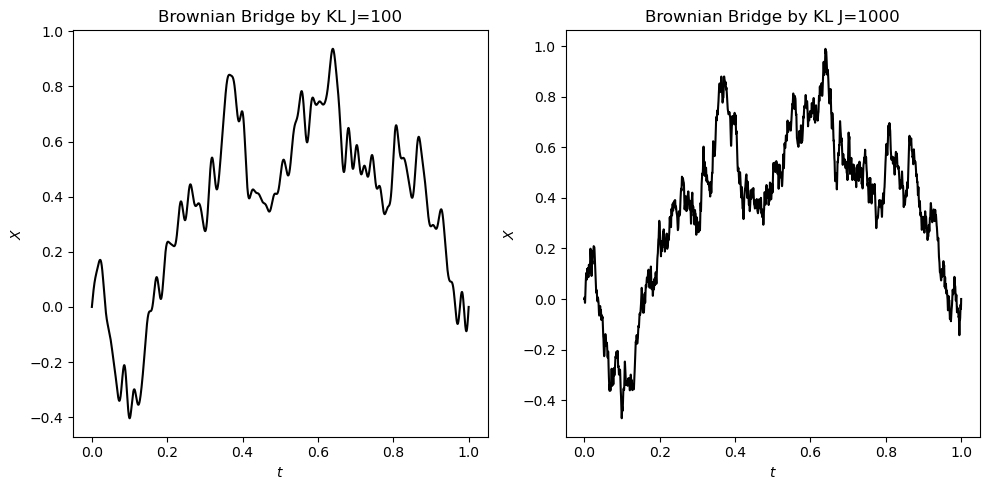

In [83]:
def KL_BrownianBridge(t, J):
    N = t.size
    B = np.zeros(N)
    j = np.arange(1, J+1)
    np.random.seed(24)
    xi = np.random.randn(J)
    for i in range(N):
        ti = t[i]
        Bt = sqrt(2)/(pi*j) * np.sin(j * pi * ti) * xi
        B[i] = np.sum(Bt)        
    return B
T = 1; N = 10000
t = np.linspace(0, T, N+1)
B1 = KL_BrownianBridge(t, 100)
B2 = KL_BrownianBridge(t, 1000)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t, B1, 'k-') 
plt.xlabel(r'$t$')
plt.ylabel(r'$X$')
plt.title(r'Brownian Bridge by KL J=100')

plt.subplot(1, 2, 2)
plt.plot(t, B2, 'k-') 
plt.xlabel(r'$t$')
plt.ylabel(r'$X$')
plt.title(r'Brownian Bridge by KL J=1000')

plt.tight_layout()
plt.show()


But normally, the eigen is not avaliable...
About Regularity of stochastic process.

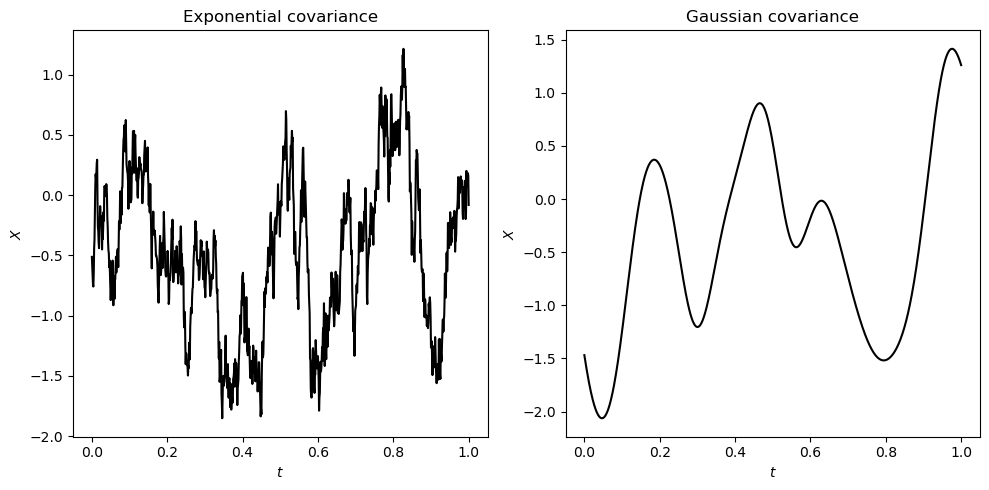

In [87]:
def Exponential(t, l):
    N = t.size
    C = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            ti = t[i]; tj = t[j]
            C[i, j] = exp(-abs(ti-tj)/l)
    S, U = np.linalg.eig(C)
    xi = np.random.randn(N)
    X = np.dot(U, S**0.5 * xi)
    return X

def Gaussian(t, l):
    N = t.size
    C = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            ti = t[i]; tj = t[j]
            C[i, j] = exp(-(ti-tj)**2/l**2)
    S, U = np.linalg.eig(C)
    xi = np.random.randn(N)
    X = np.dot(U, S**0.5 * xi)
    return X

T = 1; N = 1000
t = np.linspace(0, T, N+1)
l = 1./10
X1 = Exponential(t, l)
X2 = Gaussian(t, l)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t, X1, 'k-') 
plt.xlabel(r'$t$')
plt.ylabel(r'$X$')
plt.title(r'Exponential covariance')

plt.subplot(1, 2, 2)
plt.plot(t, X2, 'k-') 
plt.xlabel(r'$t$')
plt.ylabel(r'$X$')
plt.title(r'Gaussian covariance')

plt.tight_layout()
plt.show()

And we find that Gaussian is much smoother than exponental!